# 1.) Import the data from CCLE into a new Google Colab file

In [5]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [6]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/insurance.csv")

In [8]:
df.loc[df["sex"] == "female","sex"] = 1
df.loc[df["sex"] == "male","sex"] = 0

df.loc[df["smoker"] == "yes","smoker"] = 1
df.loc[df["smoker"] == "no","smoker"] = 0

df.loc[df["region"] == "northwest","region"] = 1
df.loc[df["region"] == "northeast","region"] = 0
df.loc[df["region"] == "southwest","region"] = 3
df.loc[df["region"] == "southeast","region"] = 2

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [10]:
import numpy as np

In [11]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

In [12]:
cut = int((len(data) * .8) // 1)

In [13]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [14]:
from sklearn import preprocessing

In [15]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

In [16]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, -0.90286618,  1.99417757,
         1.34066165],
       [-1.52464584, -0.97964634,  0.4911621 , -0.06353793, -0.50145986,
         0.4373191 ],
       [-0.81719959, -0.97964634,  0.36455128,  1.61511857, -0.50145986,
         0.4373191 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, -0.90286618, -0.50145986,
        -1.36936599],
       [ 1.65886228, -0.97964634, -1.50008089, -0.06353793, -0.50145986,
        -0.46602344],
       [ 1.02216066,  1.02077653,  0.18367867, -0.06353793, -0.50145986,
         0.4373191 ]])

# 4.) Get lambda from Lasso cross validation

In [17]:
from sklearn.linear_model import LassoCV

modCV = LassoCV().fit(in_data_scale, in_target)

In [18]:
a = modCV.alpha_

In [19]:
a

133.34880015958146

# 5.) Run a lasso regression with that Lambda

In [20]:
from sklearn.linear_model import Lasso

In [21]:
mod1 = Lasso(alpha = 124.36153733168733).fit(in_data_scale, in_target)

In [22]:
coefficient = mod1.coef_

In [23]:
coefficient

array([3572.04826817,    0.        , 1900.35791201,  406.75812258,
       9333.87039289, -336.93806225])

# 6.) Visualize the coefficients 

In [24]:
df2 = pd.DataFrame(zip(df.columns[:-1], mod1.coef_))

Text(0.5, 1.0, 'Coefficients of Lasso Regression')

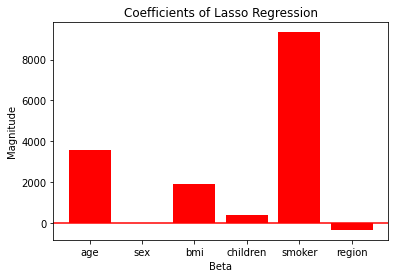

In [25]:
plt.bar(df2[0], df2[1], color = "red")
plt.axhline(0, color = "red")
plt.xlabel("Beta")
plt.ylabel("Magnitude")
plt.title("Coefficients of Lasso Regression")

# 7.) Interpret the coefficients

From the above graph, we can see that age, bmi, children and smoker all have positive effects. Out of these, smoker seems to have the highest posituve effect as it demonstrates the highest magnitutde. 

Sex, on the other hand, either has low magnitude or none at all. 

Region has a negative effect. 

# 8.) Compare in and out of sample MSE’s

In [27]:
from sklearn.metrics import mean_squared_error
in_sample_mse = mean_squared_error(mod1.predict(in_data_scale), in_target)
print(f'In-sample MSEL {in_sample_mse}')

In-sample MSEL 36478752.72611104


In [29]:
out_sample_mse = mean_squared_error(mod1.predict(out_data_scale), out_target)
print(f'Out-sample MSEL {out_sample_mse}')

Out-sample MSEL 37242752.37191438


We see that the out-sample MSE is greater than the in-sample MSE.